In [108]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns
%matplotlib inline


In [ ]:
from sklearn.datasets import load_iris


In [ ]:
iris=load_iris()


In [44]:
X=pd.DataFrame(iris.data,columns=iris.feature_names)


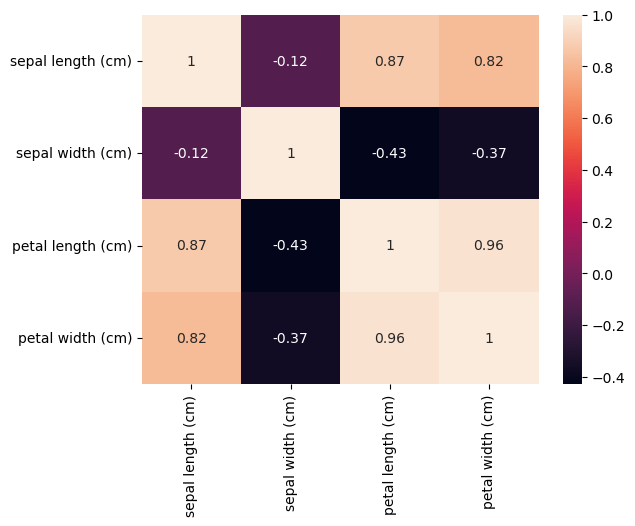

In [ ]:
correlation=X.corr()
sns.heatmap(correlation,annot=True)
plt.show()


In [ ]:
y=iris.target


In [ ]:
# Train/test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape


((120, 4), (30, 4), (120,), (30,))

In [ ]:
# Model Training
from sklearn.tree import DecisionTreeClassifier
classifier=DecisionTreeClassifier()
classifier.fit(X_train,y_train)


DecisionTreeClassifier()

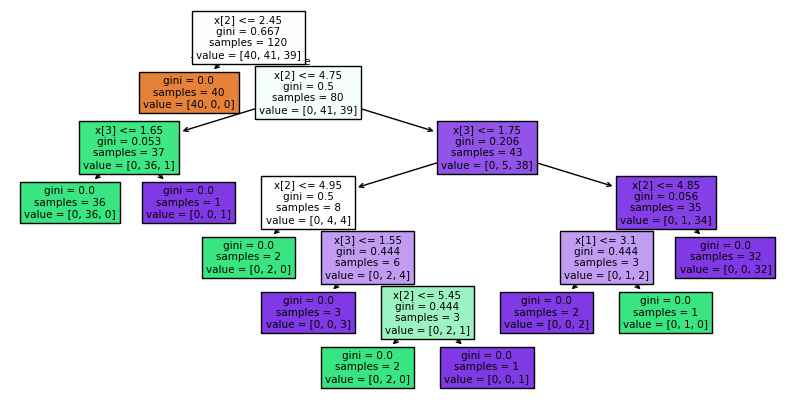

In [75]:
from sklearn.tree import plot_tree
plt.figure(figsize=(10,5))
plot_tree(classifier,filled=True)
plt.show()


In [ ]:
# Prediction
y_pred=classifier.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))


[[10  0  0]
 [ 0  9  0]
 [ 0  0 11]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      1.00      1.00         9
           2       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [ ]:
classifier.max_depth


In [85]:
# Hyper Parameter Tuning & Pre Pruning using Max_depth in hyper parameter
# create a parameter dictionary

params={
    'criterion':['gini', 'entropy', 'log_loss'],
    'max_depth':[4,5,10,20,30],
    'splitter':['best','random'],
    'max_features':['auto','sqrt', 'log2']
                 
              
}


In [ ]:
from sklearn.model_selection import GridSearchCV
classifier2=DecisionTreeClassifier()
grid=GridSearchCV(estimator=classifier2,param_grid=params,cv=5,scoring='accuracy')


In [ ]:
import warnings
warnings.filterwarnings('ignore')
grid.fit(X_train,y_train)


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [4, 5, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [ ]:
grid.best_params_


{'criterion': 'log_loss',
 'max_depth': 5,
 'max_features': 'sqrt',
 'splitter': 'random'}

In [ ]:
grid_pred=grid.predict(X_test)


In [ ]:
from sklearn.metrics import classification_report,confusion_matrix
print(confusion_matrix(y_test,grid_pred))
print(classification_report(y_test,grid_pred))


[[10  0  0]
 [ 0  9  0]
 [ 0  9  2]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       0.50      1.00      0.67         9
           2       1.00      0.18      0.31        11

    accuracy                           0.70        30
   macro avg       0.83      0.73      0.66        30
weighted avg       0.85      0.70      0.65        30

